In [1]:
import pandas as pd

# Set the directory path and filenames
dir_path = 'C:/1. Power grid frequency data/'
file_names = ['ES_PM01.csv', 'IS02.csv', 'IRL01.csv']

# Load the CSV files into dataframes
dfs = []
for file_name in file_names:
    file_path = dir_path + file_name
    df = pd.read_csv(file_path, sep=';', 
                     usecols=[0,1,2], names=['Time','f50','QI'],
                     header=0)
    df.iloc[:,1]=df.iloc[:,1]/1000+50
    dfs.append(df)


# Only select quality QI=0
flt_dfs = []
for df in dfs:
    flt_df = df[df['QI'] == 0]
    flt_dfs.append(flt_df)
    
region_dict = {0: 'Balearic', 1: 'Iceland', 2: 'Ireland'}

# Group the dataframes by region
region_groups = [df.groupby(lambda x: region_dict[i]) for i, df in enumerate(flt_dfs)]

In [4]:
tau=1

for i, df in enumerate(flt_dfs):
    df.loc[:,'increment_freq'] = df.iloc[:,1].diff(periods=tau)
    
skewness = [g.skew(numeric_only=True)['increment_freq'] for g in region_groups]
kurtosis = [g['increment_freq'].apply(pd.Series.kurtosis) for g in region_groups]

C:\Users\wp7528\AppData\Local\Temp\ipykernel_30616\3911118157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'increment_freq'] = df.iloc[:,1].diff(periods=tau)


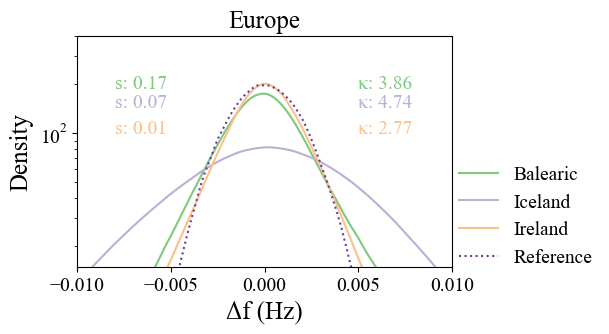

In [5]:
from numpy import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import random
fig, ax = plt.subplots(figsize=(6,3))

filtered_dfs = []
for i, df in enumerate(flt_dfs):
    df_copy = df.copy()
    df_copy['increment_freq'] = df_copy.iloc[:,1].diff(periods=tau)
    filtered_data = df_copy[(df_copy['increment_freq'] >= -0.02) & (df_copy['increment_freq'] <= 0.02)]
    filtered_dfs.append(filtered_data)
    
    
skewness = []
kurtosis = []

for df in filtered_dfs:
    skewness.append(df['f50'].skew())
    kurtosis.append(df['f50'].kurtosis()+3)

# Plot the filtered data inside the loop
for i, df in enumerate(filtered_dfs):
    sns.kdeplot(df['increment_freq'], color=colors[i], ax=ax, label=region_dict[i])
    
# Plot normal distribution curve
sns.kdeplot(random.normal(loc=0, scale=0.002,size=100000), color= '#6a3d9a', ax=ax, label='Reference',linestyle=":")

ax.set_title('Europe',fontsize=18)
ax.set_xlabel('\u0394f (Hz)',fontsize=18)
ax.set_ylabel('Density',fontsize=18)
ax.set_yscale('log') 

ax.set_xlim([-0.01,0.01])
ax.set_ylim([15,400])

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

# Add skewness and kurtosis annotations
s = skewness  
k = kurtosis 

for i, (skew_val, kurt_val) in enumerate(zip(s, k)):
    ax.text(-0.008, 190-i*45, f's: {skew_val.item():.2f}', color=colors[i], fontsize=14)
    ax.text( 0.005, 190-i*45, f'\u03ba: {kurt_val.item():.2f}', color=colors[i], fontsize=14)

#plt.legend(fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(fontsize=14,bbox_to_anchor = (1.42, 0.22), loc='center right',frameon=False)

# Adjust subplot spacing
plt.subplots_adjust(right=0.75)

plt.show()

#plt.savefig('C:/4. Paper plots/euro log plot of increment frequency.png')